## **Practical No: 5**

### **AIM:** Build an Image Re-constructor using Autoencoders.

### **CODE and OUTPUT**

In [1]:
import numpy as np
# Build an Image Re-constructor using Auto-encoders
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model

import matplotlib.pyplot as plt

class Autoencoder(object):
    
    def __init__(self, inout_dim, encoded_dim):    
        input_layer = Input(shape=(inout_dim,))
        hidden_input = Input(shape=(encoded_dim,))
        hidden_layer = Dense(encoded_dim, activation='relu')(input_layer)
        output_layer = Dense(784, activation='sigmoid')(hidden_layer)
        
        self._autoencoder_model = Model(input_layer, output_layer)
        self._encoder_model = Model(input_layer, hidden_layer)
        tmp_decoder_layer = self._autoencoder_model.layers[-1]
        self._decoder_model = Model(hidden_input, tmp_decoder_layer(hidden_input))
        
        self._autoencoder_model.compile(optimizer='adadelta', loss='binary_crossentropy')
        
    def train(self, input_train, input_test, batch_size, epochs):    
        self._autoencoder_model.fit(input_train, 
                                    input_train,
                                    epochs = epochs,
                                    batch_size=batch_size,
                                    shuffle=True,
                                    validation_data=(
                                            input_test, 
                                            input_test))
        
    def getEncodedImage(self, image):
        encoded_image = self._encoder_model.predict(image)
        return encoded_image
    
    def getDecodedImage(self, encoded_imgs):
        decoded_image = self._decoder_model.predict(encoded_imgs)
        return decoded_image

In [2]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

autoencoder = Autoencoder(x_train.shape[1], 32)
autoencoder.train(x_train, x_test, 256, 50)
encoded_imgs = autoencoder.getEncodedImage(x_test)
decoded_imgs = autoencoder.getDecodedImage(encoded_imgs)

4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/50
235/235 [==============================] - 4s 5ms/step - loss: 0.6950 - val_loss: 0.6949
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.6948 - val_loss: 0.6947
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.6946 - val_loss: 0.6945
Epoch 4/50
235/235 [==============================] - 1s 4ms/step - loss: 0.6944 - val_loss: 0.6943
Epoch 5/50
235/235 [==============================] - 1s 4ms/step - loss: 0.6942 - val_loss: 0.6941
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.6941 - val_loss: 0.6940
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.6939 - val_loss: 0.6938
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.6937 - val_loss: 0.6936
Epoch 9/50
235/235 [==============================] - 1s 4ms/step - loss: 0.6936 - val_loss: 0.6935
Epoch 10/50
235/235 [================

In [3]:
# 2nd approach using CNN

In [4]:
import numpy as np

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model

import matplotlib.pyplot as plt

class Autoencoder(object):
    
    def __init__(self):    
        
        # Encoding
        input_layer = Input(shape=(28, 28, 1)) 
        encoding_conv_layer_1 = Conv2D(16, (3, 3), activation='relu', 
                                       padding='same')(input_layer)
        encoding_pooling_layer_1 = MaxPooling2D((2, 2), 
                  
                                     padding='same')(encoding_conv_layer_1)
        encoding_conv_layer_2 = Conv2D(8, (3, 3), activation='relu', 
                                     padding='same')(encoding_pooling_layer_1)
        encoding_pooling_layer_2 = MaxPooling2D((2, 2), 
                                     padding='same')(encoding_conv_layer_2)
        encoding_conv_layer_3 = Conv2D(8, (3, 3), activation='relu', 
                                     padding='same')(encoding_pooling_layer_2)
        code_layer = MaxPooling2D((2, 2), padding='same')(encoding_conv_layer_3)
        
        # Decoding
        decodging_conv_layer_1 = Conv2D(8, (3, 3), activation='relu', 
                                      padding='same')(code_layer)
        decodging_upsampling_layer_1 = UpSampling2D((2, 2))(decodging_conv_layer_1)
        decodging_conv_layer_2 = Conv2D(8, (3, 3), activation='relu', 
                                      padding='same')(decodging_upsampling_layer_1)
        decodging_upsampling_layer_2 = UpSampling2D((2, 2))(decodging_conv_layer_2)
        decodging_conv_layer_3 = Conv2D(16, (3, 3),                      
                                   activation='relu')(decodging_upsampling_layer_2)
        decodging_upsampling_layer_3 = UpSampling2D((2, 2))(decodging_conv_layer_3)
        output_layer = Conv2D(1, (3, 3), activation='sigmoid', 
                                      padding='same')(decodging_upsampling_layer_3)
        
        self._model = Model(input_layer, output_layer)
        self._model.compile(optimizer='adadelta', loss='binary_crossentropy')
        
    def train(self, input_train, input_test, batch_size, epochs):    
        self._model.fit(input_train, 
                        input_train,
                        epochs = epochs,
                        batch_size=batch_size,
                        shuffle=True,
                        validation_data=(
                                input_test, 
                                input_test))
        
    
    def getDecodedImage(self, encoded_imgs):
        decoded_image = self._model.predict(encoded_imgs)
        return decoded_image

Epoch 1/50
235/235 [==============================] - 8s 10ms/step - loss: 0.6924 - val_loss: 0.6918
Epoch 2/50
235/235 [==============================] - 2s 8ms/step - loss: 0.6911 - val_loss: 0.6904
Epoch 3/50
235/235 [==============================] - 2s 8ms/step - loss: 0.6896 - val_loss: 0.6888
Epoch 4/50
235/235 [==============================] - 2s 8ms/step - loss: 0.6878 - val_loss: 0.6869
Epoch 5/50
235/235 [==============================] - 2s 8ms/step - loss: 0.6858 - val_loss: 0.6846
Epoch 6/50
235/235 [==============================] - 2s 8ms/step - loss: 0.6833 - val_loss: 0.6818
Epoch 7/50
235/235 [==============================] - 2s 8ms/step - loss: 0.6802 - val_loss: 0.6785
Epoch 8/50
235/235 [==============================] - 2s 8ms/step - loss: 0.6764 - val_loss: 0.6743
Epoch 9/50
235/235 [==============================] - 2s 8ms/step - loss: 0.6719 - val_loss: 0.6693
Epoch 10/50
235/235 [==============================] - 2s 8ms/step - loss: 0.6666 - val_loss: 0.663

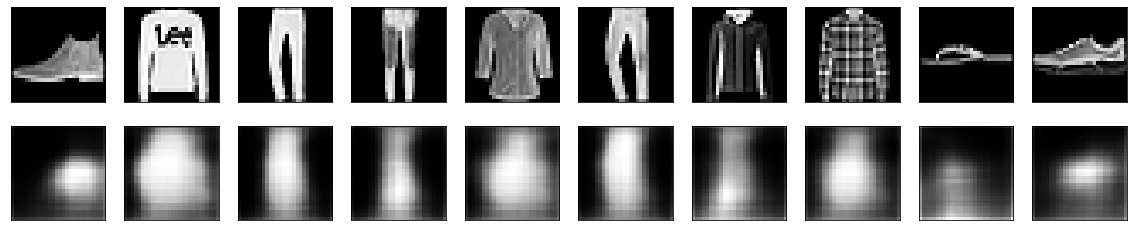

In [5]:
# Prepare input
(X_train, _), (X_test, _) = fashion_mnist.load_data()
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_train = np.reshape(X_train, (len(X_train), 28, 28, 1))
X_test = np.reshape(X_test, (len(X_test), 28, 28, 1))

autoencoder = Autoencoder()
autoencoder.train(X_train, X_test, 256, 50)
decoded_imgs = autoencoder.getDecodedImage(X_test)

plt.figure(figsize=(20, 4))
for i in range(10):
    # Original
    subplot = plt.subplot(2, 10, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    subplot.get_xaxis().set_visible(False)
    subplot.get_yaxis().set_visible(False)

    # Reconstruction
    subplot = plt.subplot(2, 10, i + 11)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    subplot.get_xaxis().set_visible(False)
    subplot.get_yaxis().set_visible(False)
plt.show()